In [2]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment C:\ProgramData\Anaconda3:

The following NEW packages will be INSTALLED:

    kiwisolver: 1.0.1-py36h12c3424_0 

The following packages will be UPDATED:

    anaconda:   5.0.1-py36h8316230_2  --> custom-py36h363777c_0
    conda:      4.3.30-py36h7e176b0_0 --> 4.5.1-py36_0         
    libpng:     1.6.32-vc14h5163883_3 --> 1.6.34-h79bbb47_0    
    matplotlib: 2.1.0-py36h11b4b9c_0  --> 2.2.2-py36h153e9ff_1 
    openssl:    1.0.2l-vc14hcac20b0_2 --> 1.0.2o-h8ea7d77_0    
    pycosat:    0.6.2-py36hf17546d_1  --> 0.6.3-py36h413d8a4_0 
    pyqt:       5.6.0-py36hb5ed885_5  --> 5.9.2-py36h1aa27d4_0 
    qt:         5.6.2-vc14h6f8c307_12 --> 5.9.4-vc14hd9fb3db_0 
    sip:        4.18.1-py36h9c25514_2 --> 4.19.8-py36h6538335_0
    sqlite:     3.20.1-vc14h7ce8c62_1 --> 3.22.0-h9d3ae62_0    




CondaIOError: Missing write permissions in: C:\ProgramData\Anaconda3
#
# You don't appear to have the necessary permissions to install packages
# into the install area 'C:\ProgramData\Anaconda3'.
# However you can clone this environment into your home directory and
# then make changes to it.
# This may be done using the command:
#
# $ conda create -n my_root --clone="C:\ProgramData\Anaconda3"




Loading the data

In [4]:
from IPython.display import Image
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
data = read_csv('driver_features_2.txt', delimiter='\t',header=None)
normalized_data=(data-data.mean())/data.std()
X=normalized_data.iloc[:, 0:8].values


Checking for optimal number of cluster

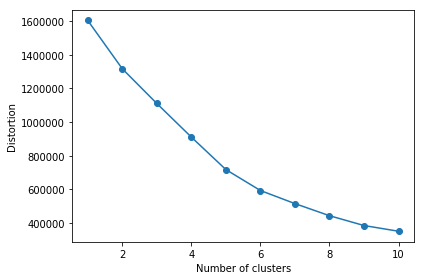

Distortion: 351708.22


In [5]:
distortions = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

It seems from the elbow test that the number of cluster is 5. So let us try with number of cluster as 5

In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y_km = km.fit_predict(X)


Clustering is done. Now it is time to plot them properly

## We plan to do the summary statistics and box plot for the clusters formed


General thing useful for all 

In [30]:
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
columns=['car_level','driver_authorized','gender',
     'age','license_issue_1','license_issue_2',
     'work_time','service_score']

### Cluster #1

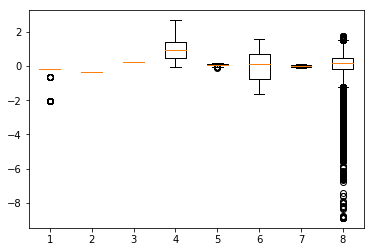

In [31]:
cl_1=X[y_km==0]
plt.boxplot(cl_1);

In [32]:
df = pd.DataFrame(cl_1,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,29929.000000,2.992900e+04,2.992900e+04,29929.000000,29929.000000,29929.000000,29929.000000,29929.000000
mean,-0.178921,-3.380028e-01,2.405867e-01,0.931341,0.074533,-0.025466,-0.008629,0.060660
std,0.227921,5.473491e-14,6.039714e-14,0.571631,0.036529,0.994530,0.050906,0.860192
min,-2.071007,-3.380028e-01,2.405867e-01,-0.029080,-0.117198,-1.630611,-0.094205,-8.875546
25%,-0.151259,-3.380028e-01,2.405867e-01,0.440986,0.045243,-0.759457,-0.056987,-0.202241
50%,-0.151259,-3.380028e-01,2.405867e-01,0.911052,0.077732,0.111697,-0.004353,0.200610
75%,-0.151259,-3.380028e-01,2.405867e-01,1.381118,0.104805,0.692467,0.041614,0.490061
max,-0.151259,-3.380028e-01,2.405867e-01,2.673800,0.153538,1.563621,0.104776,1.737779


### Cluster #2

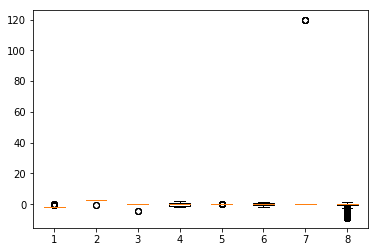

In [33]:
cl_2=X[y_km==1]
plt.boxplot(cl_2);

In [34]:
df = pd.DataFrame(cl_2,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000
mean,-1.871295,2.957547,0.238845,-0.096310,0.090859,-0.003329,0.101849,-0.309078
std,0.498140,0.056814,0.087500,0.893644,0.032409,0.984997,3.146445,1.265222
min,-2.071007,-0.338003,-4.156465,-2.026860,-0.035977,-1.630611,-0.094192,-8.888159
25%,-2.071007,2.958526,0.240587,-0.851695,0.072317,-0.759457,-0.012669,-0.641011
50%,-2.071007,2.958526,0.240587,-0.146596,0.099390,0.111697,0.036506,-0.009591
75%,-2.071007,2.958526,0.240587,0.558503,0.115635,0.692467,0.054688,0.407789
max,-0.151259,2.958526,0.240587,1.968701,0.148123,1.563621,119.548954,1.738737


### Cluster#3

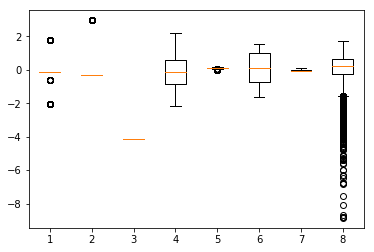

In [35]:
cl_3=X[y_km==2]
plt.boxplot(cl_3);

In [36]:
df = pd.DataFrame(cl_3,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,5419.000000,5419.000000,5.419000e+03,5419.000000,5419.000000,5419.000000,5419.000000,5419.000000
mean,0.034109,-0.224854,-4.156465e+00,-0.155704,0.108275,0.100176,-0.036815,0.083887
std,0.746807,0.600219,2.993437e-13,0.883942,0.030314,0.970859,0.049805,1.024816
min,-2.071007,-0.338003,-4.156465e+00,-2.144376,-0.008904,-1.630611,-0.094201,-8.861586
25%,-0.151259,-0.338003,-4.156465e+00,-0.851695,0.088561,-0.759457,-0.082241,-0.242464
50%,-0.151259,-0.338003,-4.156465e+00,-0.146596,0.115635,0.111697,-0.053705,0.244502
75%,-0.151259,-0.338003,-4.156465e+00,0.558503,0.131879,0.982852,0.003987,0.633998
max,1.768489,2.958526,-4.156465e+00,2.203734,0.158952,1.563621,0.098071,1.737768


### Cluster#4

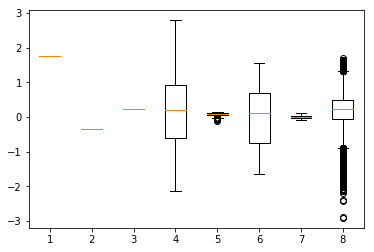

In [37]:
cl_4=X[y_km==3]
plt.boxplot(cl_4);

In [38]:
df = pd.DataFrame(cl_4,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,1.726900e+04,1.726900e+04,1.726900e+04,17269.000000,17269.000000,17269.000000,17269.000000,17269.000000
mean,1.768489e+00,-3.380028e-01,2.405867e-01,0.188628,0.084921,0.002061,0.003138,0.192026
std,2.016223e-13,9.120746e-14,8.257523e-14,1.001490,0.036312,0.992661,0.044258,0.546132
min,1.768489e+00,-3.380028e-01,2.405867e-01,-2.144376,-0.128028,-1.630611,-0.094077,-2.909324
25%,1.768489e+00,-3.380028e-01,2.405867e-01,-0.616662,0.056073,-0.759457,-0.024493,-0.070281
50%,1.768489e+00,-3.380028e-01,2.405867e-01,0.205953,0.093976,0.111697,0.006142,0.221298
75%,1.768489e+00,-3.380028e-01,2.405867e-01,0.911052,0.115635,0.692467,0.044078,0.484450
max,1.768489e+00,-3.380028e-01,2.405867e-01,2.791316,0.148123,1.563621,0.104292,1.714522


### Cluster#5

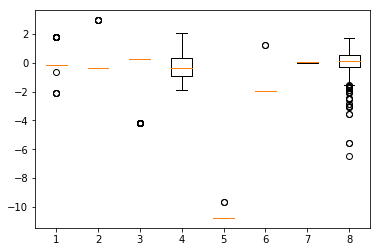

In [39]:
cl_5=X[y_km==4]
plt.boxplot(cl_5);

In [40]:
df = pd.DataFrame(cl_5,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,-0.091407,-0.318792,-0.097648,-0.214531,-10.760002,-1.913550,0.035569,0.102214
std,0.383661,0.251063,1.172363,0.892574,0.052254,0.154129,0.016820,0.806249
min,-2.071007,-0.338003,-4.156465,-1.909343,-10.762526,-1.920996,-0.001021,-6.434795
25%,-0.151259,-0.338003,0.240587,-0.939832,-10.762526,-1.920996,0.021897,-0.280284
50%,-0.151259,-0.338003,0.240587,-0.381629,-10.762526,-1.920996,0.039857,0.162177
75%,-0.151259,-0.338003,0.240587,0.323470,-10.762526,-1.920996,0.049091,0.551330
max,1.768489,2.958526,0.240587,2.086217,-9.679583,1.273236,0.066034,1.722881


### Cluster#6

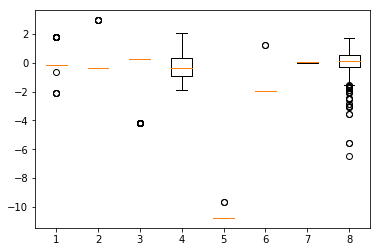

In [43]:
cl_6=X[y_km==5]
plt.boxplot(cl_5);

In [44]:
df = pd.DataFrame(cl_6,columns=columns)
df.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score
count,36746.000000,3.674600e+04,3.674600e+04,36746.000000,36746.000000,36746.000000,36746.000000,36746.000000
mean,-0.174037,-3.380028e-01,2.405867e-01,-0.792770,0.109690,0.050595,-0.017836,-0.069472
std,0.212229,1.845216e-13,9.659072e-14,0.529598,0.023535,0.982467,0.053255,1.150961
min,-2.071007,-3.380028e-01,2.405867e-01,-2.261893,-0.090125,-1.630611,-0.094206,-8.886369
25%,-0.151259,-3.380028e-01,2.405867e-01,-1.204244,0.093976,-0.759457,-0.074031,-0.295653
50%,-0.151259,-3.380028e-01,2.405867e-01,-0.734178,0.115635,0.111697,-0.013226,0.179185
75%,-0.151259,-3.380028e-01,2.405867e-01,-0.381629,0.126464,0.982852,0.033920,0.500700
max,1.768489,-3.380028e-01,2.405867e-01,0.793536,0.158952,1.563621,0.105042,1.742232
